In [ ]:
#
# found some code on github
##
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12, 12]
import matplotlib.pyplot as plt

In [3]:
img1 = np.array(Image.open(r"K:\medml\lab2\training_set\000_HC.png"))
print(img1.shape)
print(img1.max(), img1.min())

(540, 800)
243 0


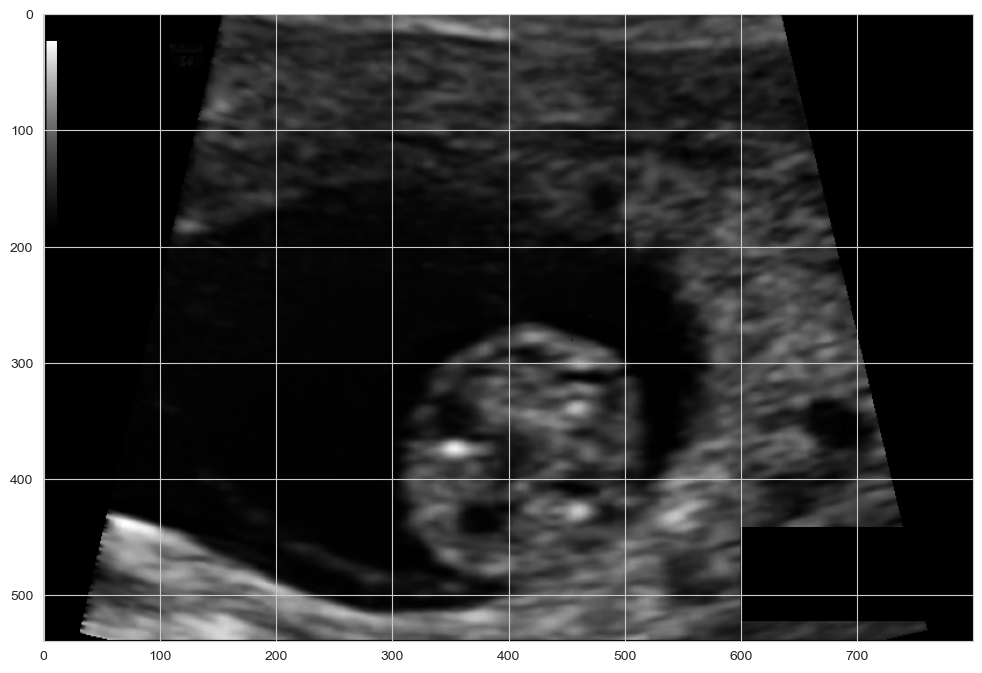

In [4]:
plt.imshow(img1, cmap="gray")

(540, 800)
243 0


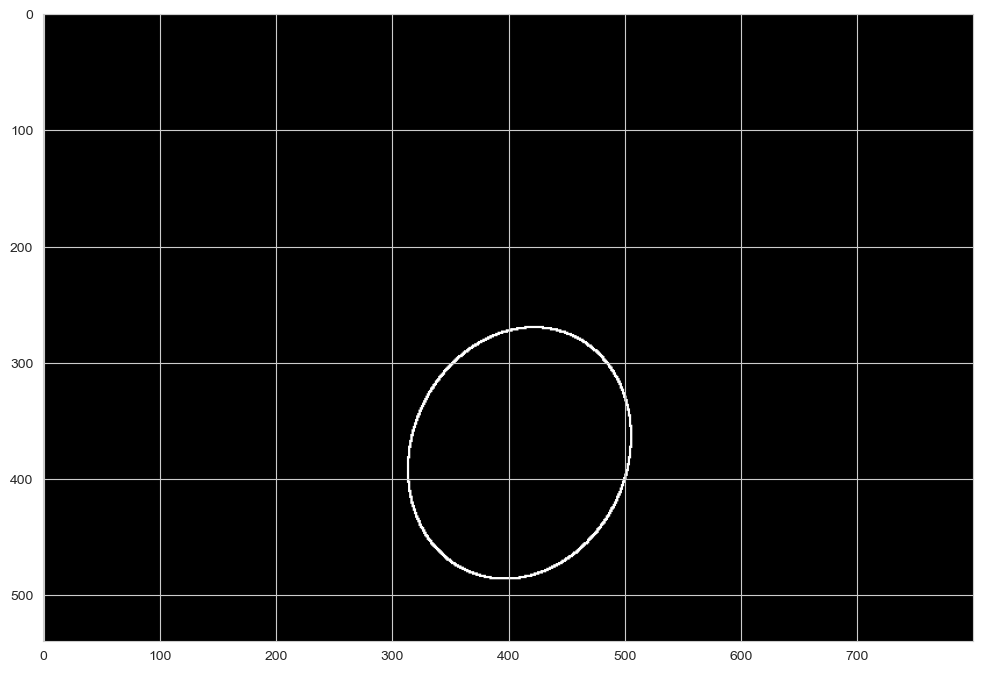

In [6]:
mask1 = np.array(Image.open(r"K:\medml\lab2\training_set\000_HC_Annotation.png"))
print(img1.shape)
print(img1.max(), img1.min())
plt.imshow(mask1, cmap="gray")

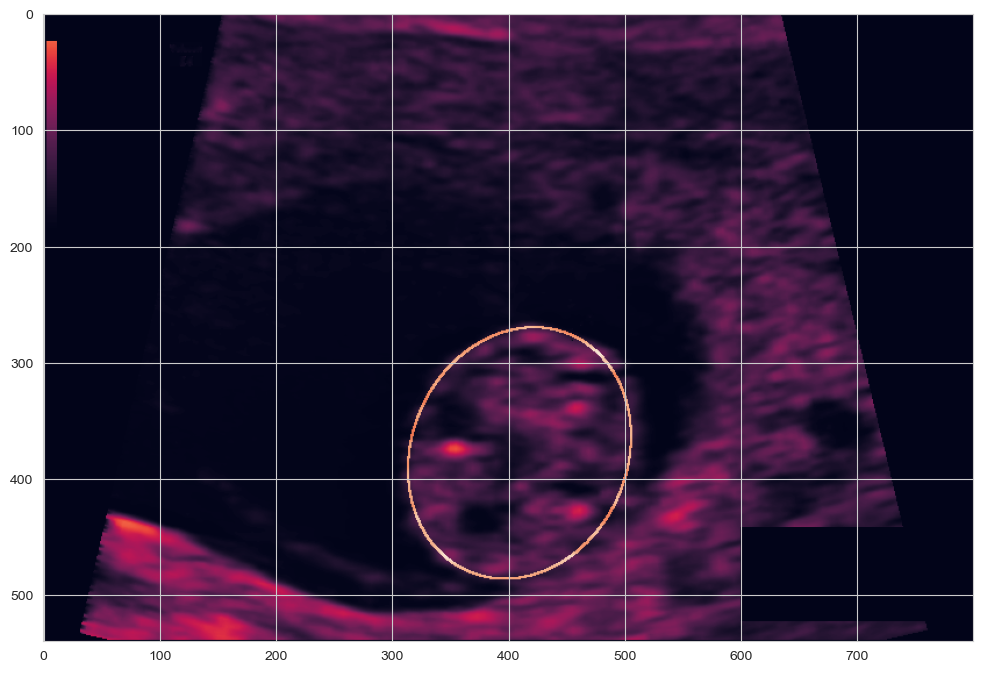

In [7]:
alpha=0.5
mixed = alpha*img1 + (1-alpha)*mask1
plt.imshow(mixed)

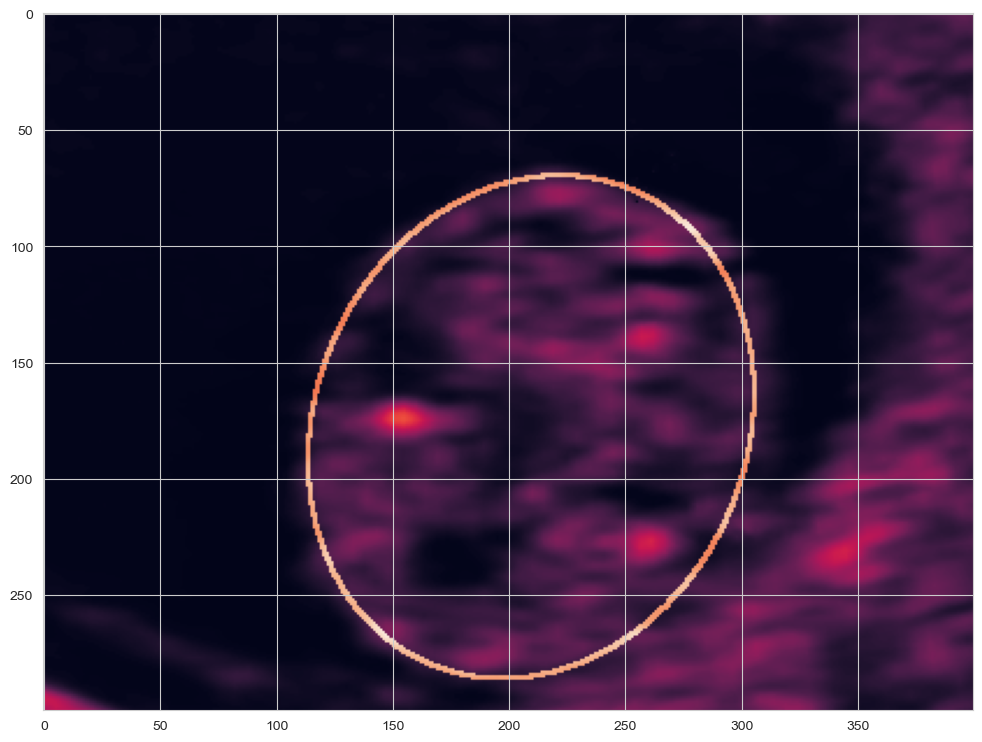

In [8]:
plt.imshow(mixed[200:500, 200:600])

# img2


(540, 800)
254 0


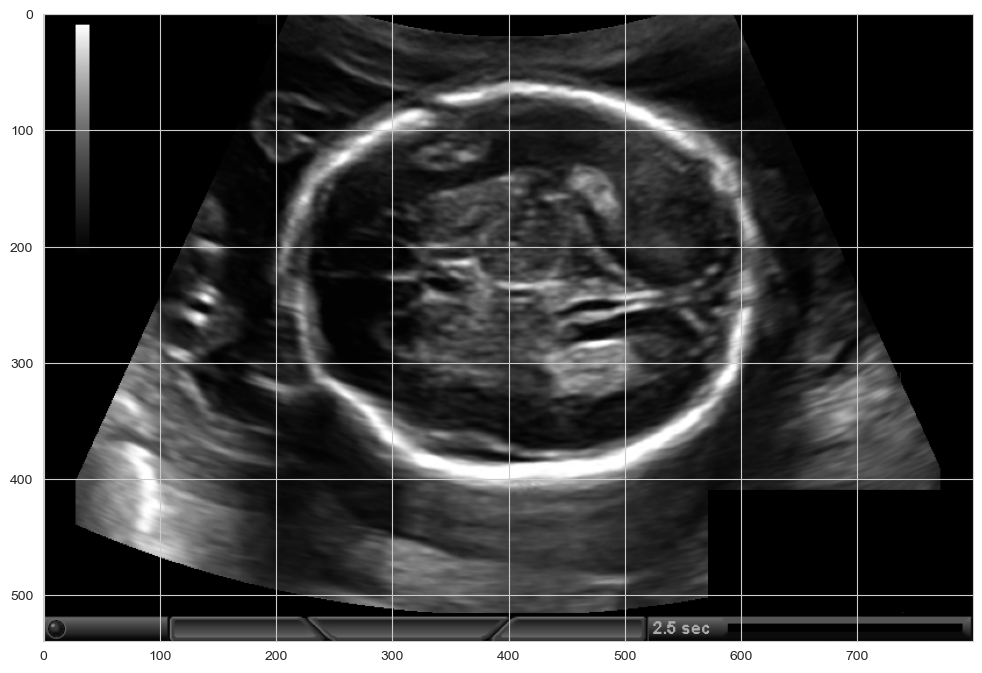

In [9]:
img2 = np.array(Image.open(r"K:\medml\lab2\training_set\322_HC.png"))
print(img2.shape)
print(img2.max(), img2.min())
plt.imshow(img2,cmap="gray")

# EDA

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from skimage import io

# Configure plotting style
sns.set_style("whitegrid")
%matplotlib inline

In [ ]:

df_train = pd.read_csv(R"K:\medml\lab2\training_set_pixel_size_and_HC.csv")

# Rename columns for easier access if they have spaces or complex names
#  filename, pixel size(mm), head circumference(mm)
df_train.columns = ['filename', 'pixel_size_mm', 'hc_mm']

print(f"Total training images: {len(df_train)}")
display(df_train.head())

Total training images: 999


,filename,pixel_size_mm,hc_mm
0,000_HC.png,0.069136,44.30
1,001_HC.png,0.089659,56.81
2,002_HC.png,0.062033,68.75
3,003_HC.png,0.091291,69.00
4,004_HC.png,0.061240,59.81


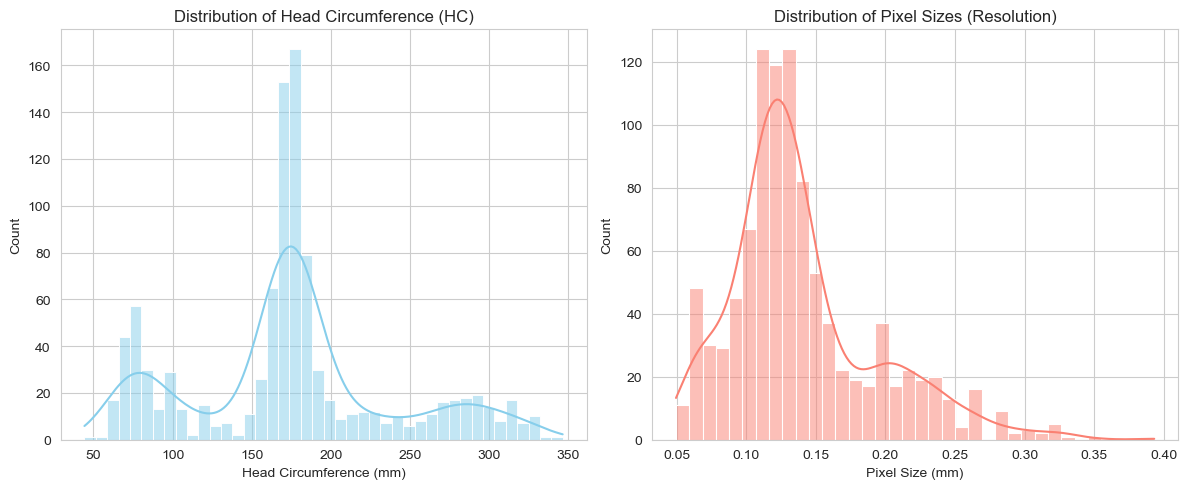

In [ ]:
plt.figure(figsize=(12, 5))

# Plot 1: Distribution of Head Circumference
plt.subplot(1, 2, 1)
sns.histplot(df_train['hc_mm'], kde=True, color='skyblue')
plt.title('Distribution of Head Circumference (HC)')
plt.xlabel('Head Circumference (mm)')


plt.subplot(1, 2, 2)
sns.histplot(df_train['pixel_size_mm'], kde=True, color='salmon')
plt.title('Distribution of Pixel Sizes (Resolution)')
plt.xlabel('Pixel Size (mm)')

plt.tight_layout()
plt.show()

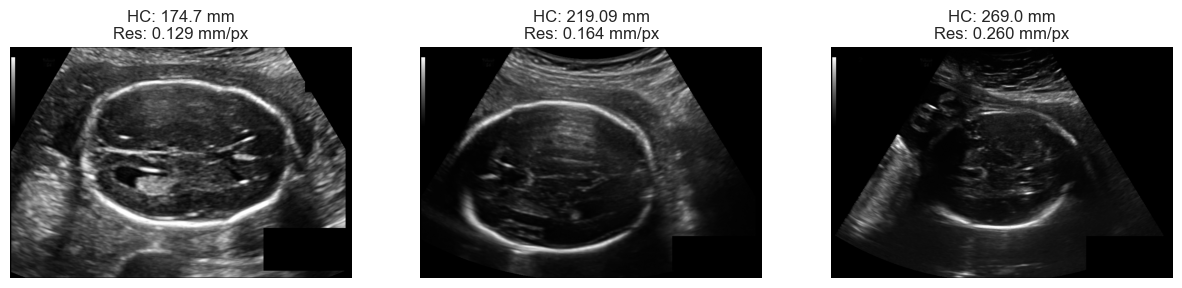

In [ ]:
import matplotlib.pyplot as plt
import os
import cv2

def show_samples(df, image_folder, num_samples=3):
    plt.figure(figsize=(15, 5))
    
    samples = df.sample(num_samples)
    
    for i, (idx, row) in enumerate(samples.iterrows()):
        img_path = os.path.join(image_folder, row['filename'])
        
        if not os.path.exists(img_path):
            print(f"Warning: Image not found at {img_path}")
            continue

       
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        plt.subplot(1, num_samples, i+1)
        if img is not None:
            plt.imshow(img, cmap='gray')
            plt.title(f"HC: {row['hc_mm']} mm\nRes: {row['pixel_size_mm']:.3f} mm/px")
        else:
            plt.text(0.5, 0.5, "Error Loading", ha='center')
        plt.axis('off')
        
    plt.show()
## absolutely AI


show_samples(df_train, r"K:\medml\lab2\training_set")